In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
import Perceptron as Custom_Perceptron

# data exploration and pre-processing

In [10]:
df = pd.read_csv('../data/dirty_data.csv')

In [11]:
len(df)

768

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


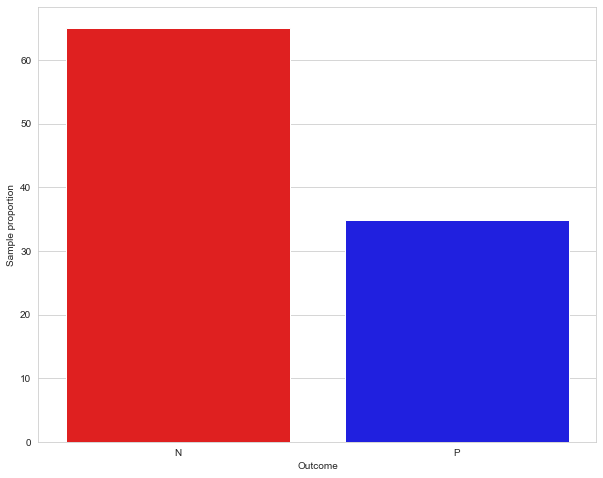

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
ax=sns.barplot(data=(df.groupby('Outcome').count()/768*100).reset_index(),x='Outcome',y='BMI',palette=('r','b'))
plt.ylabel('Sample proportion')
ax = plt.subplot()
ax = ax.set_xticklabels(["N","P"])
plt.savefig('Outputs/proportion.png')

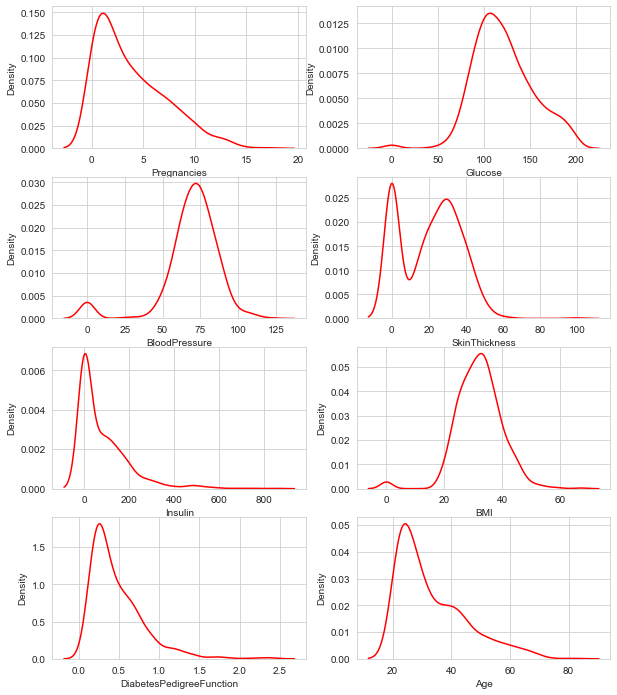

In [14]:
fig, axes= plt.subplots(4,2,figsize = (10,12))
sns.kdeplot(data=df,x=df.columns[0],ax=axes[0][0],color='r')
sns.kdeplot(data=df,x=df.columns[1],ax=axes[0][1],color='r')
sns.kdeplot(data=df,x=df.columns[2],ax=axes[1][0],color='r')
sns.kdeplot(data=df,x=df.columns[3],ax=axes[1][1],color='r')
sns.kdeplot(data=df,x=df.columns[4],ax=axes[2][0],color='r')
sns.kdeplot(data=df,x=df.columns[5],ax=axes[2][1],color='r')
sns.kdeplot(data=df,x=df.columns[6],ax=axes[3][0],color='r')
sns.kdeplot(data=df,x=df.columns[7],ax=axes[3][1],color='r')
plt.savefig('Outputs/dis.png')

In [15]:
df.BMI =  df.BMI.replace(0,df.BMI.replace(0, np.NaN).mean())
df.Glucose =  df.Glucose.replace(0,df.Glucose.replace(0, np.NaN).mean())
df.BloodPressure =  df.BloodPressure.replace(0,df.BloodPressure.replace(0, np.NaN).mean())
df.SkinThickness =  df.SkinThickness.replace(0,df.SkinThickness.replace(0, np.NaN).mean())



NameError: name 'np' is not defined

In [ ]:
fig, axes= plt.subplots(4,2,figsize = (10,12))
sns.kdeplot(data=df,x=df.columns[0],ax=axes[0][0],color='r')
sns.kdeplot(data=df,x=df.columns[1],ax=axes[0][1],color='r')
sns.kdeplot(data=df,x=df.columns[2],ax=axes[1][0],color='r')
sns.kdeplot(data=df,x=df.columns[3],ax=axes[1][1],color='r')
sns.kdeplot(data=df,x=df.columns[4],ax=axes[2][0],color='r')
sns.kdeplot(data=df,x=df.columns[5],ax=axes[2][1],color='r')
sns.kdeplot(data=df,x=df.columns[6],ax=axes[3][0],color='r')
sns.kdeplot(data=df,x=df.columns[7],ax=axes[3][1],color='r')
plt.savefig('Outputs/dis.png')

In [ ]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)*2-1
df = pd.DataFrame(x_scaled).sample(frac=1)

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,1.0
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207154,-0.766866,-0.666667,-1.0
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,1.0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,-1.0
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,1.0


In [6]:
df_features=df[list(range(8))]
df_target=df[8]

# Importing our own little perceptron

In [7]:
baby = Custom_Perceptron.Perceptron(n_epochs=1000,training_step=0.1)

In [8]:
X_train = df_features.iloc[:400]
X_test = df_features.iloc[401:550]
X_val = df_features.iloc[551:]

y_train = df_target.iloc[:400]
y_test = df_target.iloc[401:550]
y_val = df_target.iloc[551:]

## training our baby

100%|██████████| 1000/1000 [00:02<00:00, 422.78it/s]


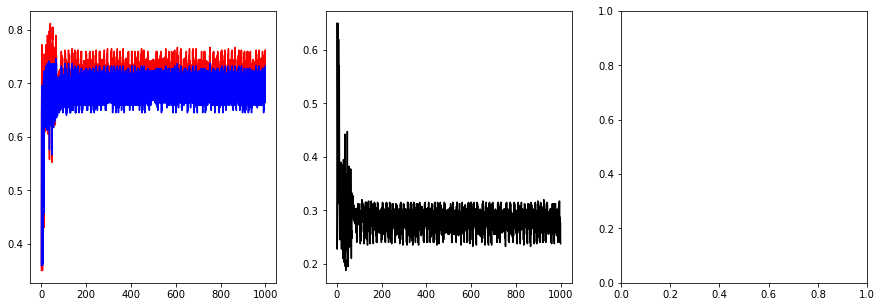

In [9]:
weights = baby.fit(X_train,y_train,X_val,y_val)
y_pred=baby.predict(X_test)
accuracy,loss,val_acc = baby.get_metrics()

In [10]:
baby.score(X_val,y_val)

0.7327188940092166

# Validating our perceptron with linearly separable data

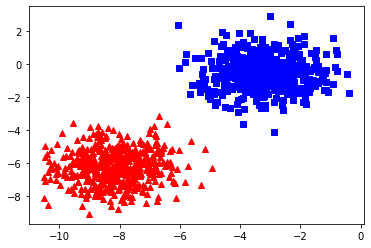

In [37]:
from sklearn import datasets
from sklearn.model_selection import train_test_split



X_2, y_2 = datasets.make_blobs(n_samples=1000, centers=2, n_features=2)
y_2 = -(y_2*2-1)


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.33, random_state=42)

fig,ax=plt.subplots(1,1)
ax.plot(X_2[:, 0][y_2 == -1], X_2[:, 1][y_2 == -1], 'r^')
ax.plot(X_2[:, 0][y_2 == 1], X_2[:, 1][y_2 == 1], 'bs')


In [38]:
baby2 = Custom_Perceptron.Perceptron(n_epochs=2000,training_step=1)

100%|██████████| 2000/2000 [00:05<00:00, 353.36it/s]


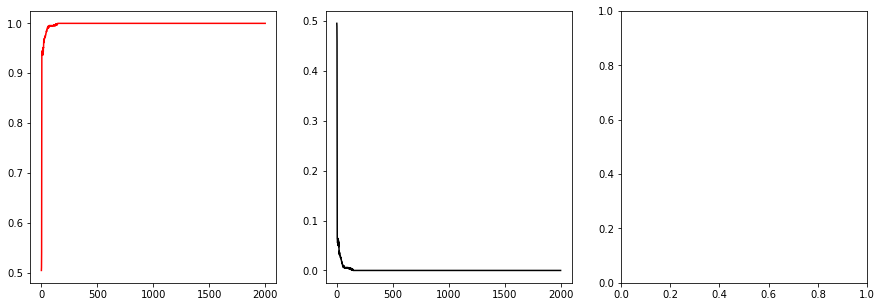

In [39]:
weights_2=baby2.fit(pd.DataFrame(X_train_2),pd.Series(y_train_2))

In [40]:
baby2.score(X_test_2,y_test_2)

1.0

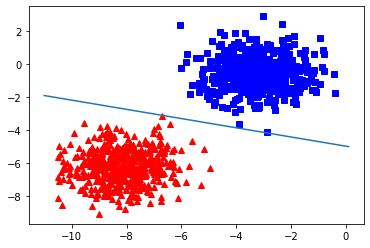

In [41]:
baby2.plot_decision_boundary(ax)
fig

# Trying other standard models

## Perceptron

In [16]:
clf = Perceptron(tol=1)
clf.fit(X_train_2,y_train_2)
clf2 = Perceptron(tol=1)
clf2.fit(X_train,y_train)

Perceptron(tol=1)

In [17]:
print(f' score of model on generated blob dataset: {clf.score(X_test_2,y_test_2)}')
print(f' score of model on diabetes dataset: {clf2.score(X_test,y_test)}')

 score of model on generated blob dataset: 0.6757575757575758
 score of model on diabetes dataset: 0.7449664429530202


## Nearest neighbours

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh_2 = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_2, y_train_2)
neigh_2.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
print(f' score of model on generated blob dataset: {neigh.score(X_test_2,y_test_2)}')
print(f' score of model on diabetes dataset: {neigh_2.score(X_test,y_test)}')

 score of model on generated blob dataset: 0.8909090909090909
 score of model on diabetes dataset: 0.697986577181208


## Linear SVM

In [20]:
from sklearn.svm import LinearSVC
SVM = LinearSVC( tol=1e-5)
SVM_2 = LinearSVC( tol=1e-5)
SVM.fit(X_train_2, y_train_2)
SVM_2.fit(X_train, y_train)

C:\Users\jngt\anaconda3\envs\UoA-DeepLearning\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(tol=1e-05)

In [21]:
print(f' score of model on generated blob dataset: {SVM.score(X_test_2,y_test_2)}')
print(f' score of model on diabetes dataset: {SVM_2.score(X_test,y_test)}')

 score of model on generated blob dataset: 0.9030303030303031
 score of model on diabetes dataset: 0.7785234899328859


## LogReg Classifier

In [22]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression().fit(X_train_2, y_train_2)
LogReg_2 = LogisticRegression().fit(X_train, y_train)

In [23]:
print(f' score of model on generated blob dataset: {LogReg.score(X_test_2,y_test_2)}')
print(f' score of model on diabetes dataset: {LogReg_2.score(X_test,y_test)}')

 score of model on generated blob dataset: 0.9030303030303031
 score of model on diabetes dataset: 0.7785234899328859


## DecisionTree and RandomForest

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


DT = DecisionTreeClassifier().fit(X_train_2, y_train_2)
DT_2 = DecisionTreeClassifier().fit(X_train, y_train)

RF = RandomForestClassifier().fit(X_train_2, y_train_2)
RF_2 = RandomForestClassifier().fit(X_train, y_train)

In [25]:
print(f' score of decision tree on generated blob dataset: {DT.score(X_test_2,y_test_2)}')
print(f' score of decision tree on diabetes dataset: {DT_2.score(X_test,y_test)}')
print(f' score of random forest on generated blob dataset: {RF.score(X_test_2,y_test_2)}')
print(f' score of random forest on diabetes dataset: {RF_2.score(X_test,y_test)}')

 score of decision tree on generated blob dataset: 0.8363636363636363
 score of decision tree on diabetes dataset: 0.6778523489932886
 score of random forest on generated blob dataset: 0.8727272727272727
 score of random forest on diabetes dataset: 0.7181208053691275


## MultiLayerPerceptron

## Improving upon the perceptron - Adaline neuron

100%|██████████| 2000/2000 [00:01<00:00, 1070.36it/s]


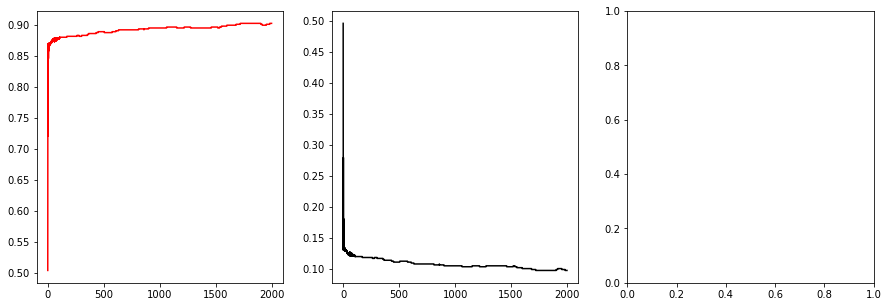

In [26]:
ada_baby = Custom_Perceptron.Perceptron(n_epochs=2000,training_step=0.00005,adaline=True)
weights = ada_baby.fit(pd.DataFrame(X_train_2),pd.Series(y_train_2))


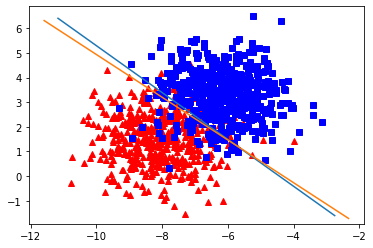

In [27]:
ada_baby.plot_decision_boundary(ax)
fig

100%|██████████| 10000/10000 [00:22<00:00, 446.17it/s]


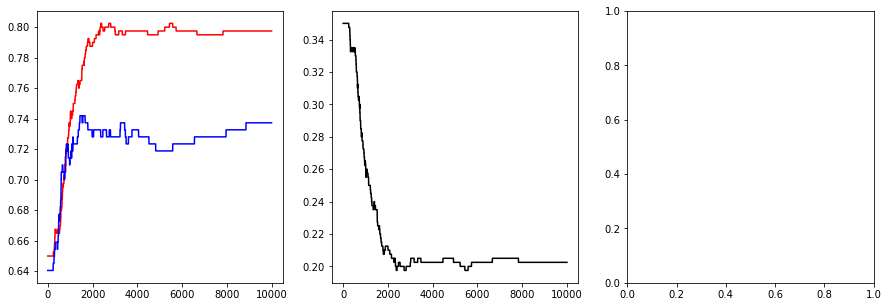

In [42]:
ada_baby = Custom_Perceptron.Perceptron(n_epochs=10000,training_step=0.00001,adaline=True)
weights = ada_baby.fit(X_train,y_train,X_val,y_val)
